# Autoencoders (solución)

Los autoencoders son algoritmos de compresión. Están compuestos por una función de compresión y una de decompresión y tienen varias aplicaciones.

A continuación veremos como se construyen varios ejemplos trabajando con la base de datos MNIST. La [base de datos MNIST](https://en.wikipedia.org/wiki/MNIST_database) cuenta con imágenes de 28x28 pixeles de dígitos escritos a mano.

Veremos:
1. Simple Autoencoder: El autoencoder más sencillo de todos con una única capa oculta
2. Deep Autoencoder: Un autoencoder con más capas ocultas y parámetros entrenables para comparar resultados con el anterior
3. Convolutional Autoencoder: Un autoencoder con redes convolucionales
4. Denoising de imágenes ruidosas

## 1 - Simple Autoencoder
A continuación crearemos un autoencoder con una única capa densa como encoder y otra como decoder.

### Encoder
Completar el código debajo para modelar la siguiente red neuronal:
1. Capa de input que reciba vectores de imágenes de 28x28
2. Una capa densa con función de activación Relu que funcionará como encoder
3. Una capa densa con función de activación Sigmoid que funcione como decoder

**¿Cuántos parámetros deberá recibir la primera capa de la red? ¿Por qué?**

**Respuesta:** 28x28 = 784

**¿Cuántos parámetros deberá tener la siguiente capa densa?**

**Respuesta:** Es un número arbitrario, 32 por ejemplo

**¿Qué determina este parámetro?**

**Respuesta:** Determina el factor de compresión del algoritmo

**¿Cuántos parámetros deberá tener la última capa de la red? ¿Por qué?**

**Respuesta:** Los mismos que la capa de Input para poder reconstruir las imágenes

In [1]:
### SOLUCIÓN
from keras.layers import Input, Dense
from keras.models import Model

# Cantidad de nodos de la capa densa del encoder
encoding_dim = 32  # 32 => Dado el input de 784 determina un factor de compresión de 24.5

#Primera capa de la red neuronal
input_img = Input(shape=(784,))
#Capa densa de encoder
encoded = Dense(encoding_dim, activation='relu')(input_img)
#Capa densa de decoder
decoded = Dense(784, activation='sigmoid')(encoded)

#Modelo de autoencoder completo
autoencoder = Model(input_img, decoded)

Using TensorFlow backend.


In [2]:
# Crearemos un modelo para el encoder por separado para poder utilizarlo independientemente
encoder = Model(input_img, encoded)

## Decoder
De forma análoga al encoder, crearemos un modelo para el decoder. Estará compuesto por una capa de input y la capa de decoder que ya creamos como parte del autoencoder.

**¿Cuántos parámetros deberá tener la capa input?**

**Respuesta:** Deberá tener "encoding_dim" parámetros.

In [3]:
### SOLUCIÓN
#Primera capa de la red neuronal
encoded_input = Input(shape=(encoding_dim,))
# Tomaremos la última capa del modelo del autoencoder
decoder_layer = autoencoder.layers[-1]

#Modelo de decoder completo
decoder = Model(encoded_input, decoder_layer(encoded_input))

Analicemos un poco mejor los distintos modelos utilizados.

In [4]:
encoder.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 784)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 32)                25120     
Total params: 25,120
Trainable params: 25,120
Non-trainable params: 0
_________________________________________________________________


In [5]:
decoder.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         (None, 32)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 784)               25872     
Total params: 25,872
Trainable params: 25,872
Non-trainable params: 0
_________________________________________________________________


In [6]:
autoencoder.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 784)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 32)                25120     
_________________________________________________________________
dense_2 (Dense)              (None, 784)               25872     
Total params: 50,992
Trainable params: 50,992
Non-trainable params: 0
_________________________________________________________________


## Entrenamiento
Compilar el autoencoder con un optimizador adadelta y pérdida binary_crossentropy.

In [7]:
### SOLUCIÓN
autoencoder.compile(optimizer='adadelta', loss='binary_crossentropy')

Importaremos la base de datos MNIST que ya viene precargada en Keras

In [8]:
from keras.datasets import mnist
import numpy as np
(x_train, _), (x_test, _) = mnist.load_data()

Normalizaremos los valores entre 0 y 1 y transformaremos las imágenes (de 28x28) en un vector.

In [9]:
#Normalización
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
#Flatten
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))
#Verifico que vectores tienen la forma deseada
print(x_train.shape)
print(x_test.shape)

(60000, 784)
(10000, 784)


Ahora sí, entrenaremos el autoencoder con 50 epochs y un batch size de 256.

**¿Qué utilizaremos como training data y qué como resultado esperado de ese training data? ¿Por qué?**

**Respuesta:** x_train será el training y también el resultado esperado

In [10]:
### SOLUCIÓN
training_data = x_train
training_labels = x_train
test_data = x_test
test_labels = x_test
autoencoder.fit(training_data,training_labels,
                epochs=50,
                batch_size=256,
                shuffle=True,
                validation_data=(test_data,test_labels))

Train on 60000 samples, validate on 10000 samples
Epoch 1/50
60000/60000 [==============================] - 3s - loss: 0.3779 - val_loss: 0.2722
Epoch 2/50
60000/60000 [==============================] - 3s - loss: 0.2641 - val_loss: 0.2527
Epoch 3/50
60000/60000 [==============================] - 3s - loss: 0.2426 - val_loss: 0.2304
Epoch 4/50
60000/60000 [==============================] - 3s - loss: 0.2230 - val_loss: 0.2133
Epoch 5/50
60000/60000 [==============================] - 3s - loss: 0.2080 - val_loss: 0.2004
Epoch 6/50
60000/60000 [==============================] - 3s - loss: 0.1970 - val_loss: 0.1909
Epoch 7/50
60000/60000 [==============================] - 3s - loss: 0.1887 - val_loss: 0.1838
Epoch 8/50
60000/60000 [==============================] - 3s - loss: 0.1823 - val_loss: 0.1780
Epoch 9/50
60000/60000 [==============================] - 4s - loss: 0.1770 - val_loss: 0.1732
Epoch 10/50
60000/60000 [==============================] - 4s - loss: 0.1723 - val_loss: 0.1687

## Resultados
Ahora usaremos los datos de MNIST para ver gráficamente el funcionamiento.

In [11]:
### SOLUCIÓN
# Aplicar el encoding a los datos de test
encoded_imgs = encoder.predict(x_test)
# Hacer la decompresión sobre el resultado del encoding
decoded_imgs = decoder.predict(encoded_imgs)

El siguiente código se utilizará para graficar el input y output obtenido sobre algunos de los datos de prueba. Comparar las dos imágenes y notar como la reconstrucción es con pérdida.

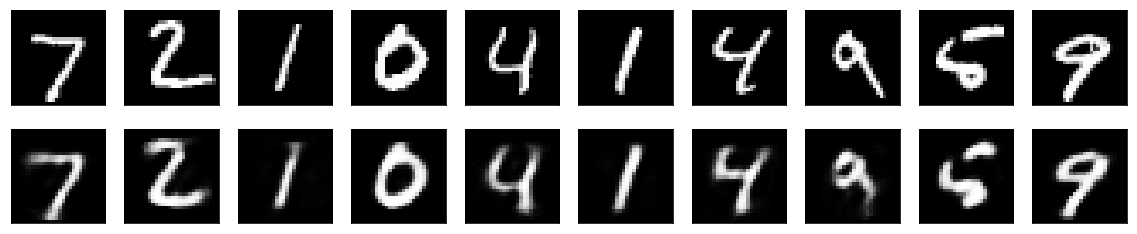

In [12]:
import matplotlib.pyplot as plt

#Cantidad de dígitos a graficar
n = 10  
plt.figure(figsize=(20, 4))
for i in range(n):
    # Imagen original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Reconstrucción
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

Observemos ahora el resultado intermedio, los vectores con los datos comprimidos. Notar como cada dígito se representa únicamente con 32 pixeles y a partir de eso se logra reconstruir la imagen que se observa arriba.

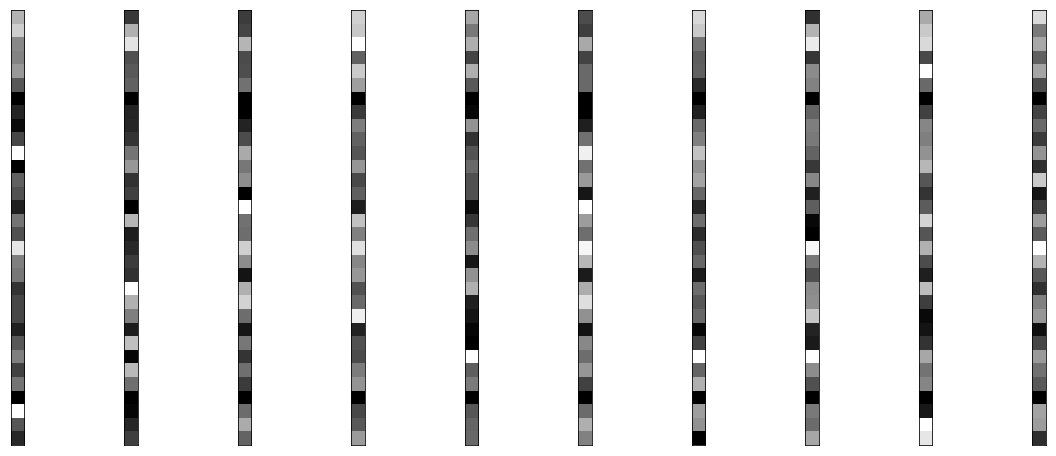

In [13]:
n = 10
plt.figure(figsize=(20, 8))
for i in range(n):
    ax = plt.subplot(1, n, i + 1)
    plt.imshow(encoded_imgs[i].reshape(1, 4 * 8).T)
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

**Indicar dos formas que se te ocurren para mejorar la calidad de la reconstrucción**

**Respuesta:** Aumentar el encoding_dim o usar una red más compleja, con mayor cantidad de capas.

## 2 - Deep Autoencoder
Trataremos de mejorar la reconstrucción de las imágenes utilizando una red más compleja.

### Encoder
Crear una red neuronal que reciba las imágenes de MNIST y esté compuesta por tres capas densas con función de activación Relu. Mantener el mismo factor de compresión que la red anterior.

**¿Cómo mantenemos el mismo factor de compresión?**

**Respuesta:** Que la capa densa con menor cantidad de nodos tenga el mismo valor de encoding_dim

In [14]:
### SOLUCIÓN
#Primera capa de input
deep_input_img = Input(shape=(784,))
#Capas densas (podemos reutilizar la variable y que cada capa tenga como input la anterior)
deep_encoded = Dense(128, activation='relu')(deep_input_img)
deep_encoded = Dense(64, activation='relu')(deep_encoded)
deep_encoded = Dense(32, activation='relu')(deep_encoded)
#Modelo completo
deep_encoder = Model(deep_input_img, deep_encoded)

### Decoder
Hagamos ahora un decoder simétrico al encoder pero que la última capa tenga función de activación Sigmoid.

In [15]:
### SOLUCIÓN
deep_decoded = Dense(64, activation='relu')(deep_encoded)
deep_decoded = Dense(128, activation='relu')(deep_decoded)
deep_decoded = Dense(784, activation='sigmoid')(deep_decoded)

# Modelo de autoencoder completo
deep_autoencoder = Model(deep_input_img, deep_decoded)

### Entrenamiento y resultados
Compilemos y entrenemos al igual que antes pero con 100 epochs ahora.

In [16]:
### SOLUCIÓN
deep_autoencoder.compile(optimizer='adadelta', loss='binary_crossentropy')

deep_autoencoder.fit(x_train, x_train,
                epochs=100,
                batch_size=256,
                shuffle=True,
                validation_data=(x_test, x_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/100
60000/60000 [==============================] - 5s - loss: 0.3357 - val_loss: 0.2631
Epoch 2/100
60000/60000 [==============================] - 5s - loss: 0.2559 - val_loss: 0.2467
Epoch 3/100
60000/60000 [==============================] - 6s - loss: 0.2373 - val_loss: 0.2220
Epoch 4/100
60000/60000 [==============================] - 6s - loss: 0.2118 - val_loss: 0.2030
Epoch 5/100
60000/60000 [==============================] - 6s - loss: 0.1971 - val_loss: 0.1899
Epoch 6/100
60000/60000 [==============================] - 7s - loss: 0.1873 - val_loss: 0.1824
Epoch 7/100
60000/60000 [==============================] - 6s - loss: 0.1802 - val_loss: 0.1772
Epoch 8/100
60000/60000 [==============================] - 7s - loss: 0.1741 - val_loss: 0.1704
Epoch 9/100
60000/60000 [==============================] - 6s - loss: 0.1694 - val_loss: 0.1663
Epoch 10/100
60000/60000 [==============================] - 7s - loss: 0.1651 - val_lo

60000/60000 [==============================] - 7s - loss: 0.1010 - val_loss: 0.1002
Epoch 86/100
60000/60000 [==============================] - 6s - loss: 0.1009 - val_loss: 0.0989
Epoch 87/100
60000/60000 [==============================] - 5s - loss: 0.1007 - val_loss: 0.1013
Epoch 88/100
60000/60000 [==============================] - 5s - loss: 0.1006 - val_loss: 0.0994
Epoch 89/100
60000/60000 [==============================] - 5s - loss: 0.1003 - val_loss: 0.0986
Epoch 90/100
60000/60000 [==============================] - 7s - loss: 0.1002 - val_loss: 0.0986
Epoch 91/100
60000/60000 [==============================] - 5s - loss: 0.1000 - val_loss: 0.0987
Epoch 92/100
60000/60000 [==============================] - 6s - loss: 0.0998 - val_loss: 0.0984
Epoch 93/100
60000/60000 [==============================] - 6s - loss: 0.0997 - val_loss: 0.0985
Epoch 94/100
60000/60000 [==============================] - 5s - loss: 0.0995 - val_loss: 0.0982
Epoch 95/100
60000/60000 [=================

A continuación apliquemos el autoencoder a los datos de test.

In [17]:
### SOLUCIÓN
deep_decoded_imgs = deep_autoencoder.predict(x_test)

Analicemos los resultados al igual que antes

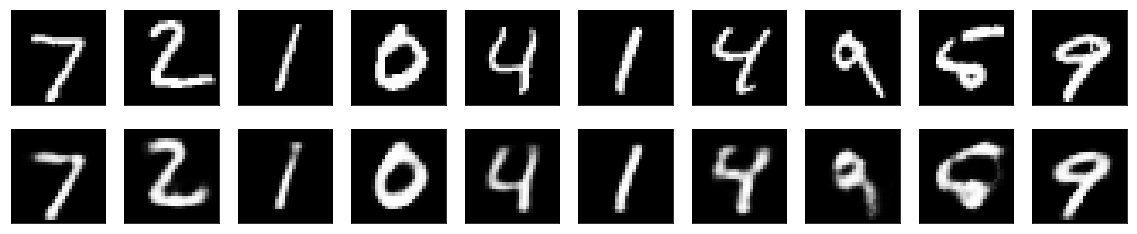

In [18]:
n = 10
plt.figure(figsize=(20, 4))
for i in range(n):
    # Original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    
    # Reconstrucción
    ax = plt.subplot(2, n, i + n + 1)
    plt.imshow(deep_decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

## 3 - Convolutional Autoencoder
Ahora trataremos de mejorar la reconstrucción con un tipo de red distinta: una red convolucional. Ya que estamos trabajando con imágenes, probaremos este tipo de redes que mantienen información espacial relevante para las imágenes.

Para el encoding utilizaremos capas:
- Conv2D
- MaxPooling2D

Crear una red neuronal para el encoder  que reciba las imágenes y a continuación tenga:
1. Capa de Conv2D con 16 filtros, una ventana de convolución de 3x3, activación relu y padding 'same'
2. Capa de MaxPooling con pool size de 2x2 y padding 'same'
3. Capa de Conv2D con 8 filtros, una ventana de convolución de 3x3, activación relu y padding 'same'
4. Capa de MaxPooling con pool size de 2x2 y padding 'same'
5. Capa de Conv2D con 8 filtros, una ventana de convolución de 3x3, activación relu y padding 'same'
6. Capa de MaxPooling con pool size de 2x2 y padding 'same'

Pensar: 
- ¿Cuál es el input shape ahora y por qué?
- ¿Cómo logramos la simetría dado que vamos a hacer pooling?

Investigar las capas:
- UpSampling2D

In [19]:
#Imports necesarios
from keras.layers import Input, Dense, Conv2D, MaxPooling2D, UpSampling2D

In [20]:
### SOLUCIÓN
conv_input_img = Input(shape=(28, 28, 1))
x = Conv2D(16, (3, 3), activation='relu', padding='same')(conv_input_img)
x = MaxPooling2D((2, 2), padding='same')(x)
x = Conv2D(8, (3, 3), activation='relu', padding='same')(x)
x = MaxPooling2D((2, 2), padding='same')(x)
x = Conv2D(8, (3, 3), activation='relu', padding='same')(x)
conv_encoded = MaxPooling2D((2, 2), padding='same')(x)

Completar la red con un decoder que tenga las siguientes capas:
1. Capa de Conv2D con 8 filtros, una ventana de convolución de 3x3, activación relu y padding 'same'
2. Capa de UpSampling2D con size 2x2
3. Capa de Conv2D con 8 filtros, una ventana de convolución de 3x3, activación relu y padding 'same'
4. Capa de UpSampling2D con size 2x2
5. Capa de Conv2D con 16 filtros, una ventana de convolución de 3x3, activación relu y padding 'same'
6. Capa de UpSampling2D con size 2x2
7. Capa de Conv2D con 1 filtro, una ventana de convolución de 3x3, activación sigmoid y padding 'same'

In [21]:
### SOLUCIÓN
x = Conv2D(8, (3, 3), activation='relu', padding='same')(conv_encoded)
x = UpSampling2D((2, 2))(x)
x = Conv2D(8, (3, 3), activation='relu', padding='same')(x)
x = UpSampling2D((2, 2))(x)
x = Conv2D(16, (3, 3), activation='relu')(x)
x = UpSampling2D((2, 2))(x)
conv_decoded = Conv2D(1, (3, 3), activation='sigmoid', padding='same')(x)

#Modelo completo
conv_autoencoder = Model(conv_input_img, conv_decoded)

Compilemos el autoencoder con mismo optimizar y función de pérdida que hasta el momento.

In [22]:
### SOLUCIÓN
conv_autoencoder.compile(optimizer='adadelta', loss='binary_crossentropy')

In [23]:
# Observemos la arquitectura de nuestra red
conv_autoencoder.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_4 (InputLayer)         (None, 28, 28, 1)         0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 28, 28, 16)        160       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 16)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 14, 14, 8)         1160      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 7, 7, 8)           0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 7, 7, 8)           584       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 4, 4, 8)           0         
__________

Ahora debemos volver a cargar los datos de MNIST. 

**¿Por qué?**

**Respuesta: ** Porque ahora trabajo con imágenes y tienen una dimensión distinta.

In [24]:
#Cargo datos de MNIST
(x_train_2, _), (x_test_2, _) = mnist.load_data()
#Normalizo
x_train_2 = x_train_2.astype('float32') / 255.
x_test_2 = x_test_2.astype('float32') / 255.
#Doy la forma necesaria
x_train_2 = np.reshape(x_train_2, (len(x_train_2), 28, 28, 1))
x_test_2 = np.reshape(x_test_2, (len(x_test_2), 28, 28, 1))

In [25]:
# Verifico la nueva forma de mis datos
print(x_train_2.shape)
print(x_test_2.shape)

(60000, 28, 28, 1)
(10000, 28, 28, 1)


In [26]:
# Entrenamiento (puede demorar mucho)
conv_autoencoder.fit(x_train_2, x_train_2,
                epochs=20,
                batch_size=128,
                shuffle=True,
                validation_data=(x_test_2, x_test_2))

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 91s - loss: 0.2348 - val_loss: 0.1761
Epoch 2/20
60000/60000 [==============================] - 82s - loss: 0.1646 - val_loss: 0.1538
Epoch 3/20
60000/60000 [==============================] - 80s - loss: 0.1463 - val_loss: 0.1389
Epoch 4/20
60000/60000 [==============================] - 83s - loss: 0.1355 - val_loss: 0.1313
Epoch 5/20
60000/60000 [==============================] - 85s - loss: 0.1291 - val_loss: 0.1263
Epoch 6/20
60000/60000 [==============================] - 84s - loss: 0.1249 - val_loss: 0.1210
Epoch 7/20
60000/60000 [==============================] - 89s - loss: 0.1217 - val_loss: 0.1183
Epoch 8/20
60000/60000 [==============================] - 86s - loss: 0.1191 - val_loss: 0.1183
Epoch 9/20
60000/60000 [==============================] - 88s - loss: 0.1173 - val_loss: 0.1183
Epoch 10/20
60000/60000 [==============================] - 89s - loss: 0.1162 - val_lo

In [27]:
# Código para guardar los modelos utilizados, descomentar si se precisa
autoencoder.save('autoencoder_saved.h5')
deep_autoencoder.save('deep_autoencoder_saved.h5')
conv_autoencoder.save('conv_autoencoder_saved.h5')

# Levanto modelos (arquitectura y pesos) de un archivo HDF5 guardado para evitar entrenamiento
from keras.models import load_model
autoencoder = load_model('autoencoder_saved.h5')
deep_autoencoder = load_model('deep_autoencoder_saved.h5')
conv_autoencoder = load_model('conv_autoencoder_saved.h5')

Ahora usemos el modelo conv_autoencoder para predecir sobre los datos de test.

In [28]:
### SOLUCIÓN
conv_decoded_imgs = conv_autoencoder.predict(x_test_2)

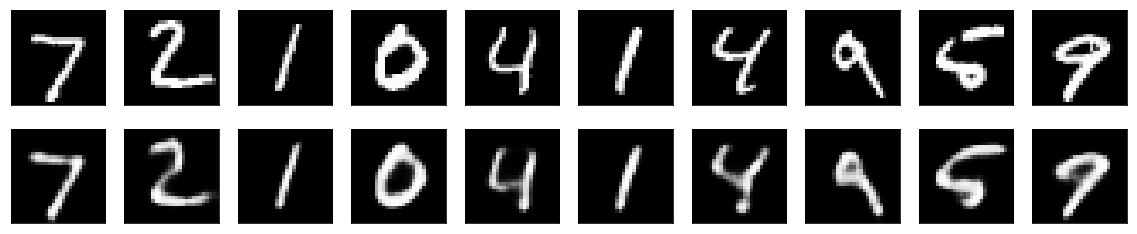

In [29]:
# Grafiquemos el resultado
n = 10
plt.figure(figsize=(20, 4))
for i in range(n):
    # Original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test_2[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    
    # Reconstrucción
    ax = plt.subplot(2, n, i + n + 1)
    plt.imshow(conv_decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

## 4 - Genero imágenes ruidosas

Ahora genero imágenes ruidosas. Mi objetivo es reconstruir las imágenes reales a partir de unas ruidosas. Como no tengo datos de entrenamiento los genero degradando la calidad de mis datos.

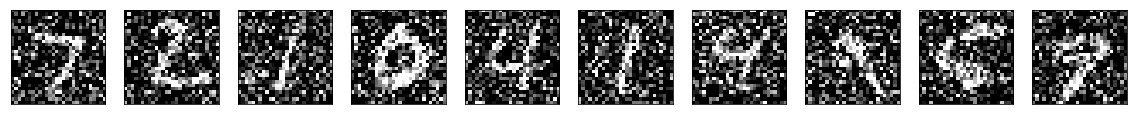

In [30]:
noise_factor = 0.5
x_train_noisy = x_train_2 + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_train_2.shape) 
x_test_noisy = x_test_2 + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_test_2.shape) 

x_train_noisy = np.clip(x_train_noisy, 0., 1.)
x_test_noisy = np.clip(x_test_noisy, 0., 1.)

n = 10
plt.figure(figsize=(20, 2))
for i in range(n):
    ax = plt.subplot(1, n, i + 1)
    plt.imshow(x_test_noisy[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

Vuelvo a entrenar modelo, ahora con las imágenes ruidosas. Ahora usamos una red con más filtros por capa para mejorar la calidad de la reconstrucción.

Completar la red que tenga las siguientes capas:
1. Capa de input con la forma necesaria
2. Capa de Conv2D con 32 filtros, una ventana de convolución de 3x3, activación relu y padding 'same'
3. Capa de MaxPooling con pool size de 2x2 y padding 'same'
4. Capa de Conv2D con 32 filtros, una ventana de convolución de 3x3, activación relu y padding 'same'
5. Capa de MaxPooling con pool size de 2x2 y padding 'same'

Hasta aquí fue el encoder. Ahora el decoder:
6. Capa de Conv2D con 32 filtros, una ventana de convolución de 3x3, activación relu y padding 'same'
7. Capa de UpSampling2D con size 2x2
8. Capa de Conv2D con 32 filtros, una ventana de convolución de 3x3, activación sigmoid y padding 'same'
9. Capa de UpSampling2D con size 2x2
10. Capa de Conv2D con 1 filtro, una ventana de convolución de 3x3, activación sigmoid y padding 'same'

In [31]:
### Solución
#Capa de input
noisy_input_img = Input(shape=(28, 28, 1))
#Encoder
nx = Conv2D(32, (3, 3), activation='relu', padding='same')(noisy_input_img)
nx = MaxPooling2D((2, 2), padding='same')(nx)
nx = Conv2D(32, (3, 3), activation='relu', padding='same')(nx)
noisy_encoded = MaxPooling2D((2, 2), padding='same')(nx)
#Decoder
nx = Conv2D(32, (3, 3), activation='relu', padding='same')(noisy_encoded)
nx = UpSampling2D((2, 2))(nx)
nx = Conv2D(32, (3, 3), activation='relu', padding='same')(nx)
nx = UpSampling2D((2, 2))(nx)
noisy_decoded = Conv2D(1, (3, 3), activation='sigmoid', padding='same')(nx)

In [32]:
#Modelo completo
noisy_autoencoder = Model(noisy_input_img, noisy_decoded)
#Compilación
noisy_autoencoder.compile(optimizer='adadelta', loss='binary_crossentropy')

**¿Qué utilizaremos como training data y qué como resultado esperado de ese training data? ¿Por qué?**

**Respuesta:** x_train será el training y también el resultado esperado

In [33]:
noisy_input_img = Input(shape=(28, 28, 1))

nx = Conv2D(32, (3, 3), activation='relu', padding='same')(noisy_input_img)
nx = MaxPooling2D((2, 2), padding='same')(nx)
nx = Conv2D(32, (3, 3), activation='relu', padding='same')(nx)
noisy_encoded = MaxPooling2D((2, 2), padding='same')(nx)

nx = Conv2D(32, (3, 3), activation='relu', padding='same')(noisy_encoded)
nx = UpSampling2D((2, 2))(nx)
nx = Conv2D(32, (3, 3), activation='relu', padding='same')(nx)
nx = UpSampling2D((2, 2))(nx)
noisy_decoded = Conv2D(1, (3, 3), activation='sigmoid', padding='same')(nx)

noisy_autoencoder = Model(noisy_input_img, noisy_decoded)
noisy_autoencoder.compile(optimizer='adadelta', loss='binary_crossentropy')

In [34]:
### SOLUCIÓN
noisy_training_data = x_train_noisy
nosiy_training_labels = x_train_2
noisy_test_data = x_test_noisy
noisy_test_labels = x_test_2
#Entrenamiento
noisy_autoencoder.fit(noisy_training_data, nosiy_training_labels,
                epochs=100,
                batch_size=128,
                shuffle=True,
                validation_data=(noisy_test_data, noisy_test_labels))

Train on 60000 samples, validate on 10000 samples
Epoch 1/100
60000/60000 [==============================] - 170s - loss: 0.1977 - val_loss: 0.1339
Epoch 2/100
60000/60000 [==============================] - 172s - loss: 0.1252 - val_loss: 0.1184
Epoch 3/100
60000/60000 [==============================] - 179s - loss: 0.1155 - val_loss: 0.1122
Epoch 4/100
60000/60000 [==============================] - 160s - loss: 0.1109 - val_loss: 0.1088
Epoch 5/100
60000/60000 [==============================] - 176s - loss: 0.1082 - val_loss: 0.1054
Epoch 6/100
60000/60000 [==============================] - 178s - loss: 0.1063 - val_loss: 0.1051
Epoch 7/100
60000/60000 [==============================] - 201s - loss: 0.1048 - val_loss: 0.1033
Epoch 8/100
60000/60000 [==============================] - 258s - loss: 0.1039 - val_loss: 0.1019
Epoch 9/100
60000/60000 [==============================] - 174s - loss: 0.1031 - val_loss: 0.1033
Epoch 10/100
60000/60000 [==============================] - 185s - l

In [35]:
#Guardo el modelo
noisy_autoencoder.save('noisy_autoencoder_saved.h5')

# Levanto modelos (arquitectura y pesos) de un archivo HDF5 guardado para evitar entrenamiento
noisy_autoencoder = load_model('noisy_autoencoder_saved.h5')

Ahora usar el nuevo autoencoder para reconstruir la imágen original a partir de las imágenes ruidosas.

In [36]:
### SOLUCIÓN
noisy_decoded_imgs = noisy_autoencoder.predict(x_train_noisy)

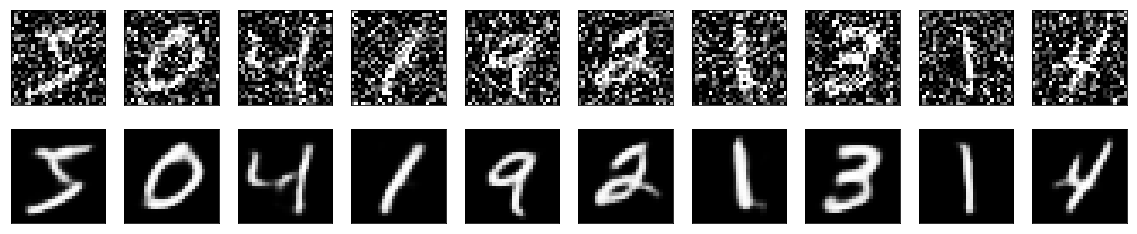

In [37]:
#Grafico el resultado
n = 10
plt.figure(figsize=(20, 4))
for i in range(n):
    # Original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_train_noisy[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    
    # Reconstrucción
    ax = plt.subplot(2, n, i + n + 1)
    plt.imshow(noisy_decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()